In [1]:
from pykrx import stock
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False
stock_list = pd.DataFrame({'종목코드':stock.get_market_ticker_list(market="ALL")})
stock_list['종목명'] = stock_list['종목코드'].map(lambda x: stock.get_market_ticker_name(x))


In [2]:
# stock_list[stock_list['종목명'].str.contains('중공')]

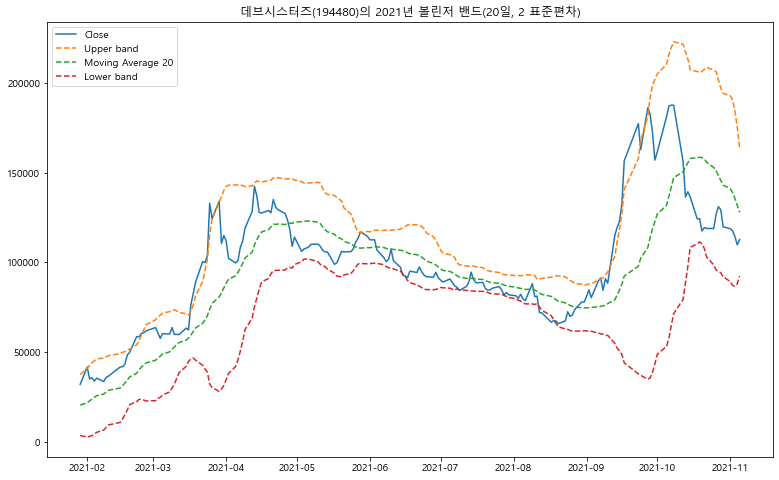

In [36]:
name = '데브시스터즈'
fromdate = str(20210101)
todate = str(20211107)

ticker = stock_list.loc[stock_list['종목명']==name, '종목코드']
df = stock.get_market_ohlcv_by_date(fromdate=fromdate, todate=todate, ticker=ticker)


df = df.rename(columns={'시가':'Open', '고가':'High', '저가':'Low', '종가':'Close', '거래량':'Volume'})
df['ma20'] = df['Close'].rolling(window=20).mean() # 20일 이동평균
df['stddev'] = df['Close'].rolling(window=20).std() # 20일 이동표준편차
df['upper'] = df['ma20'] + 2*df['stddev'] # 상단밴드
df['lower'] = df['ma20'] - 2*df['stddev'] # 하단밴드
df = df[19:] # 20일 이동평균을 구했기 때문에 20번째 행부터 값이 들어가 있음


plt.figure(figsize=(13, 8))
plt.plot(df.index, df['Close'], label='Close')
plt.plot(df.index, df['upper'], linestyle='dashed', label='Upper band')
plt.plot(df.index, df['ma20'], linestyle='dashed', label='Moving Average 20')
plt.plot(df.index, df['lower'], linestyle='dashed', label='Lower band')
plt.title(f'{name}({int(ticker.values)})의 2021년 볼린저 밴드(20일, 2 표준편차)')
plt.legend(loc='best');
plt.show()

In [37]:
df['volatility'] = df['upper'] - df['lower']
df.head()

,Open,High,Low,Close,Volume,ma20,stddev,upper,lower,volatility
날짜,,,,,,,,,,
2021-01-29,33500,34600,29100,32200,1195861,20715.0,8463.499028,37641.998055,3788.001945,33853.996110
2021-02-01,33700,41850,33150,41850,2200135,22062.5,9562.933857,41188.367713,2936.632287,38251.735427
2021-02-02,41100,41800,34800,35200,1236892,23040.0,9867.298462,42774.596925,3305.403075,39469.193850
2021-02-03,35100,37350,33000,35900,411098,24035.0,10120.134959,44275.269917,3794.730083,40480.539834
2021-02-04,35800,35900,33700,34000,187919,24930.0,10172.827584,45275.655168,4584.344832,40691.310336


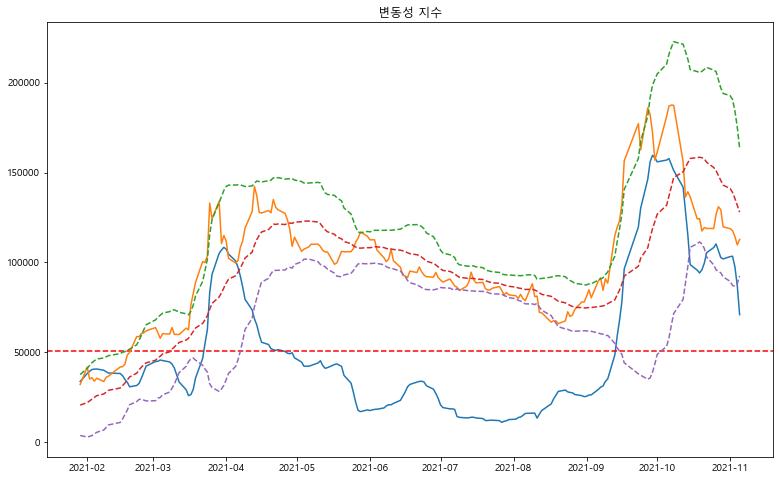

In [40]:
plt.figure(figsize=(13, 8))
plt.plot(df['volatility'])
plt.axhline(df['volatility'].mean(), color='red', linestyle='--')
plt.plot(df.index, df['Close'], label='Close')
plt.plot(df.index, df['upper'], linestyle='dashed', label='Upper band')
plt.plot(df.index, df['ma20'], linestyle='dashed', label='Moving Average 20')
plt.plot(df.index, df['lower'], linestyle='dashed', label='Lower band')
plt.title('변동성 지수')
plt.show()

56616.95777141308

In [14]:
df.head()

,Open,High,Low,Close,Volume,ma20,stddev,upper,lower
날짜,,,,,,,,,
2021-06-28,92100,93200,90100,91800,62902,99550.0,7388.931979,114327.863958,84772.136042
2021-06-29,91500,95300,91500,94500,106053,98645.0,6790.665032,112226.330064,85063.669936
2021-06-30,94200,94400,91100,91600,74780,97595.0,6108.619880,109812.239761,85377.760239
2021-07-01,91800,92500,90000,90200,75521,96475.0,5198.367659,106871.735318,86078.264682
2021-07-02,90300,91600,89000,89100,94896,95585.0,4830.307280,105245.614560,85924.385440


In [15]:
df[df['Close'] >= df['ma20']*1.03]

,Open,High,Low,Close,Volume,ma20,stddev,upper,lower
날짜,,,,,,,,,
2021-07-14,90000,97000,89500,94600,260080,91170.0,3485.926593,98141.853186,84198.146814
2021-08-09,77700,91200,77000,88200,491540,85075.0,4060.707094,93196.414188,76953.585812
2021-08-30,75000,78600,72300,78100,128599,74890.0,6486.820647,87863.641294,61916.358706
2021-08-31,76200,79500,76200,78000,73829,74715.0,6344.767840,87404.535681,62025.464319
2021-09-01,78100,82500,78100,81100,114993,74770.0,6397.540646,87565.081292,61974.918708
2021-09-02,81200,86000,81000,84800,127752,74895.0,6574.390106,88043.780212,61746.219788
2021-09-03,84900,85100,78400,80400,136864,74925.0,6599.272288,88123.544577,61726.455423
2021-09-06,84500,94400,80900,89700,529043,75470.0,7344.177787,90158.355574,60781.644426
2021-09-07,93500,97800,88900,91400,468344,75630.0,7664.003351,90958.006703,60301.993297
